Dataset Size: 150 rows, 4 columns
Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Class 'setosa':
  Precision: 1.00
  Recall: 1.00
  Specificity: nan
  F1-Score: 1.00
Class 'versicolor':
  Precision: 1.00
  Recall: 1.00
  Specificity: nan
  F1-Score: 1.00
Class 'virginica':
  Precision: 1.00
  Recall: 1.00
  Specificity: nan
  F1-Score: 1.00

Macro Average Precision: 1.00
Macro Average Recall: 1.00
Macro Average F1-Score: 1.00


<ipython-input-3-036f66044482>:48: RuntimeWarning: invalid value encountered in scalar divide
  specificity.append(true_negatives / (true_negatives + false_positives))


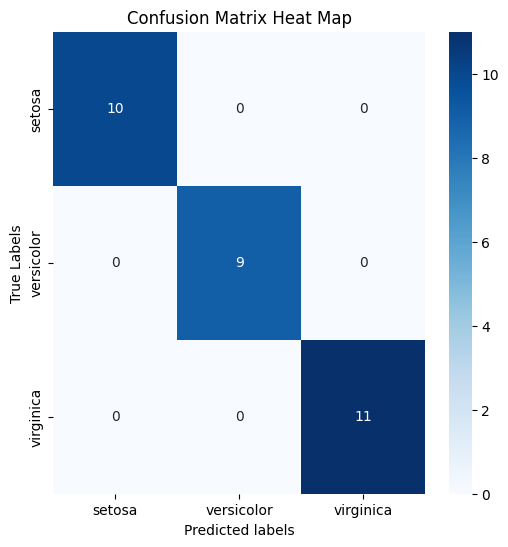

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Print the size of the dataset
print(f"Dataset Size: {X.shape[0]} rows, {X.shape[1]} columns")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Calculate specificity for each class
specificity = []
for i in range(len(iris.target_names)):
    true_negatives = np.sum(np.delete(conf_matrix, i, axis=0)) - np.sum(np.delete(conf_matrix, i, axis=1))
    false_positives = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity.append(true_negatives / (true_negatives + false_positives))

# Print precision, recall, specificity, and F1-score for each class
for i, class_name in enumerate(iris.target_names):
    print(f"Class '{class_name}':")
    print(f"  Precision: {precision[i]:.2f}")
    print(f"  Recall: {recall[i]:.2f}")
    print(f"  Specificity: {specificity[i]:.2f}")
    print(f"  F1-Score: {f1[i]:.2f}")

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heat Map')
plt.show()


Best number of neighbors: 5
Cross-validation F1 Scores: [0.69565217 0.86956522 0.66666667]
Average F1 Score: 0.7440
Confusion Matrix:
 [[5685    1]
 [   2    8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5686
           1       0.89      0.80      0.84        10

    accuracy                           1.00      5696
   macro avg       0.94      0.90      0.92      5696
weighted avg       1.00      1.00      1.00      5696



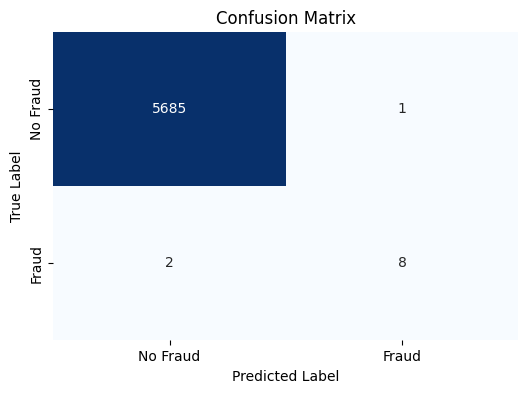

Area Under Precision-Recall Curve (AUC-PRC): 0.9998


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_auc_score

# Load the dataset
df = pd.read_csv('creditcard.csv.zip')

# Scale 'Amount' and 'Time' features
scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

# Split dataset into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Use a smaller subset of the data for faster computation
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=42)

# Prevent overfitting: Use GridSearchCV to tune 'n_neighbors'
param_grid = {'n_neighbors': [3, 5]}  # Reduced the search space for faster computation
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='f1', n_jobs=-1)  # Reduced CV folds to 3 for faster execution
grid_search.fit(X_train, y_train)

# Best number of neighbors based on cross-validation
best_knn = grid_search.best_estimator_
print(f'Best number of neighbors: {grid_search.best_params_["n_neighbors"]}')

# Perform cross-validation on the training set to prevent overfitting
cv_scores = cross_val_score(best_knn, X_train, y_train, cv=3, scoring='f1')
print(f'Cross-validation F1 Scores: {cv_scores}')
print(f'Average F1 Score: {cv_scores.mean():.4f}')

# Train on the full training set with best model
best_knn.fit(X_train, y_train)

# Predict on test set (binary predictions)
y_pred = best_knn.predict(X_test)

# Evaluation: Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Predict probabilities for the positive class (fraud cases)
y_prob = best_knn.predict_proba(X_test)[:, 1]

# AUC for Precision-Recall Curve using probabilities
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auc_prc = roc_auc_score(y_test, y_prob)  # Use probabilities here
print(f'Area Under Precision-Recall Curve (AUC-PRC): {auc_prc:.4f}')


Confusion Matrix:
 [[5685    1]
 [   6    4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5686
           1       0.80      0.40      0.53        10

    accuracy                           1.00      5696
   macro avg       0.90      0.70      0.77      5696
weighted avg       1.00      1.00      1.00      5696



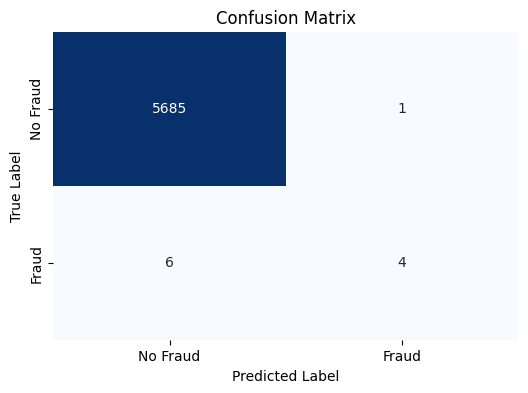

Area Under Precision-Recall Curve (AUC-PRC): 0.9999


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_auc_score

# Load the dataset
df = pd.read_csv('creditcard.csv.zip')

# Scale 'Amount' and 'Time' features
scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

# Split dataset into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Use a smaller subset of the data for faster computation
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set (binary predictions)
y_pred = log_reg.predict(X_test)

# Evaluation: Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Predict probabilities for the positive class (fraud cases)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# AUC for Precision-Recall Curve using probabilities
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auc_prc = roc_auc_score(y_test, y_prob)  # Use probabilities here
print(f'Area Under Precision-Recall Curve (AUC-PRC): {auc_prc:.4f}')


Dataset Size: 150 rows, 4 columns
Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Class 'setosa':
  Precision: 1.00
  Recall: 1.00
  Specificity: nan
  F1-Score: 1.00
Class 'versicolor':
  Precision: 1.00
  Recall: 1.00
  Specificity: nan
  F1-Score: 1.00
Class 'virginica':
  Precision: 1.00
  Recall: 1.00
  Specificity: nan
  F1-Score: 1.00

Macro Average Precision: 1.00
Macro Average Recall: 1.00
Macro Average F1-Score: 1.00


<ipython-input-6-9e570f49991f>:48: RuntimeWarning: invalid value encountered in scalar divide
  specificity.append(true_negatives / (true_negatives + false_positives))


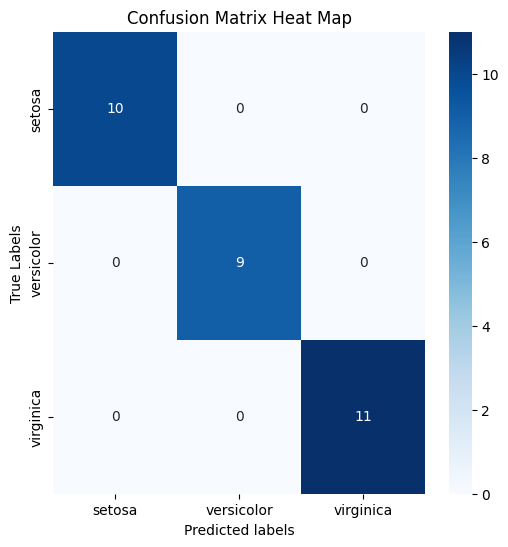

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Print the size of the dataset
print(f"Dataset Size: {X.shape[0]} rows, {X.shape[1]} columns")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = log_reg.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Calculate specificity for each class
specificity = []
for i in range(len(iris.target_names)):
    true_negatives = np.sum(np.delete(conf_matrix, i, axis=0)) - np.sum(np.delete(conf_matrix, i, axis=1))
    false_positives = np.sum(conf_matrix[:, i]) - conf_matrix[i, i]
    specificity.append(true_negatives / (true_negatives + false_positives))

# Print precision, recall, specificity, and F1-score for each class
for i, class_name in enumerate(iris.target_names):
    print(f"Class '{class_name}':")
    print(f"  Precision: {precision[i]:.2f}")
    print(f"  Recall: {recall[i]:.2f}")
    print(f"  Specificity: {specificity[i]:.2f}")
    print(f"  F1-Score: {f1[i]:.2f}")

# Calculate and print macro averages
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1 = np.mean(f1)
print(f"\nMacro Average Precision: {macro_precision:.2f}")
print(f"Macro Average Recall: {macro_recall:.2f}")
print(f"Macro Average F1-Score: {macro_f1:.2f}")

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names,
